## Predictive Modeling using MLP (Multi-Layer Perceptron)

In [1]:
# load libraries
import pandas as pd
import nltk # https://www.nltk.org/ ; nltk helps with tokenization, stopwords dictionary, lemmatization
import re # https://docs.python.org/3/library/re.html ; re is used for regular expressions
import numpy as np

data_BazarVoice = pd.read_csv("BazarVoice_edit.csv", header = 0, engine='python')
data_BazarVoice.head()

,Product,Product_Collection,ReviewID,Date,Review_Title,Review,WordCloud,Rating,Location,Product_website
0,"Kids Anticavity Fluoride Mouthwash, Berry Spla...",Kids Mouthwash Collection,221839752,6/27/2020,Great product,We bought this product and absolutely love it!...,BOUGHT,5,USA,https://www.listerine.com/mouthwash/for-kids/l...
1,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221832493,6/27/2020,Oral Tissue Sloughing-- A Serious Concern,I figured I would weigh in here regarding the ...,FIGURED,1,Philadelphia,https://www.listerine.com/mouthwash/anticavity...
2,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221784924,6/26/2020,*** Mouth Sloughing !!! ***,"If you want to LIVE an actual NIGHTMARE, use t...",WANT,1,Syracuse,https://www.listerine.com/mouthwash/anticavity...
3,Chewable Tablets Soft Mint,On-The-Go Oral Care Products,221768439,6/26/2020,It works,Love this product it does what it's supposed t...,LOVE,5,Columbus,https://www.listerine.com/on-the-go-oral-healt...
4,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221771164,6/26/2020,Zero option no good at all,"I got the original, the green one the blue min...",GOT,1,Hialeah,https://www.listerine.com/mouthwash/anticavity...


In [2]:
data_BazarVoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8591 entries, 0 to 8590
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Product             8591 non-null   object
 1   Product_Collection  8591 non-null   object
 2   ReviewID            8591 non-null   int64 
 3   Date                8591 non-null   object
 4   Review_Title        8591 non-null   object
 5   Review              8591 non-null   object
 6   WordCloud           8579 non-null   object
 7   Rating              8591 non-null   int64 
 8   Location            6332 non-null   object
 9   Product_website     8591 non-null   object
dtypes: int64(2), object(8)
memory usage: 671.3+ KB


##### Create 'Sentiment' column

In [3]:
# use the "Stars" column to assign a sentiment. If the number of starts is 3 or greater, then the review is positive (use 1), otherwise negative (use 0)
data_BazarVoice["Sentiment"] = data_BazarVoice['Rating'].apply(lambda x: 1 if x >= 3 else 0)
data_BazarVoice.head(4)

,Product,Product_Collection,ReviewID,Date,Review_Title,Review,WordCloud,Rating,Location,Product_website,Sentiment
0,"Kids Anticavity Fluoride Mouthwash, Berry Spla...",Kids Mouthwash Collection,221839752,6/27/2020,Great product,We bought this product and absolutely love it!...,BOUGHT,5,USA,https://www.listerine.com/mouthwash/for-kids/l...,1
1,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221832493,6/27/2020,Oral Tissue Sloughing-- A Serious Concern,I figured I would weigh in here regarding the ...,FIGURED,1,Philadelphia,https://www.listerine.com/mouthwash/anticavity...,0
2,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221784924,6/26/2020,*** Mouth Sloughing !!! ***,"If you want to LIVE an actual NIGHTMARE, use t...",WANT,1,Syracuse,https://www.listerine.com/mouthwash/anticavity...,0
3,Chewable Tablets Soft Mint,On-The-Go Oral Care Products,221768439,6/26/2020,It works,Love this product it does what it's supposed t...,LOVE,5,Columbus,https://www.listerine.com/on-the-go-oral-healt...,1


##### Clean text data

In [4]:
# lower case the "text" column and save it under a column named "tweet_lower"
data_BazarVoice["review_lower"] = data_BazarVoice["Review"].str.lower()
# remove usernames (any set of characters that start with @)
#data_listerine["tweet_no@"] = data_listerine["tweet_lower"].apply(lambda x: re.sub('@[\w]*',' ',x))
# change '0' to 'zero' before we remove all numbers; make the change only if '0' is surrounded by spaces
data_BazarVoice["review_no0"] = data_BazarVoice["review_lower"].apply(lambda x: re.sub('\s+[0]\s+',' zero ',x))
# remove all characters except for letters
data_BazarVoice["review_just_letters"] = data_BazarVoice["review_no0"].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))
data_BazarVoice.head(2)
#data_listerine["tweet_just_letters"][2]  # use this to  check a certain review number (! indexing starts at 0 in Python)

,Product,Product_Collection,ReviewID,Date,Review_Title,Review,WordCloud,Rating,Location,Product_website,Sentiment,review_lower,review_no0,review_just_letters
0,"Kids Anticavity Fluoride Mouthwash, Berry Spla...",Kids Mouthwash Collection,221839752,6/27/2020,Great product,We bought this product and absolutely love it!...,BOUGHT,5,USA,https://www.listerine.com/mouthwash/for-kids/l...,1,we bought this product and absolutely love it!...,we bought this product and absolutely love it!...,we bought this product and absolutely love it ...
1,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221832493,6/27/2020,Oral Tissue Sloughing-- A Serious Concern,I figured I would weigh in here regarding the ...,FIGURED,1,Philadelphia,https://www.listerine.com/mouthwash/anticavity...,0,i figured i would weigh in here regarding the ...,i figured i would weigh in here regarding the ...,i figured i would weigh in here regarding the ...


In [5]:
# download the stopwords dictionary
from nltk.corpus import stopwords
nltk.download('stopwords')

# save the list of stopwords in stop_words
stop_words = set(stopwords.words("english"))
stop_words
## ! look in the pre-processing file for the code to add/ remove words to the stopwords dictionary

# remove the words that exist in the stopwords dictionary from tweets
data_BazarVoice["review_no_stop_words"] = data_BazarVoice["review_just_letters"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))
data_BazarVoice.head(2)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Product,Product_Collection,ReviewID,Date,Review_Title,Review,WordCloud,Rating,Location,Product_website,Sentiment,review_lower,review_no0,review_just_letters,review_no_stop_words
0,"Kids Anticavity Fluoride Mouthwash, Berry Spla...",Kids Mouthwash Collection,221839752,6/27/2020,Great product,We bought this product and absolutely love it!...,BOUGHT,5,USA,https://www.listerine.com/mouthwash/for-kids/l...,1,we bought this product and absolutely love it!...,we bought this product and absolutely love it!...,we bought this product and absolutely love it ...,bought product absolutely love burn leave mout...
1,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221832493,6/27/2020,Oral Tissue Sloughing-- A Serious Concern,I figured I would weigh in here regarding the ...,FIGURED,1,Philadelphia,https://www.listerine.com/mouthwash/anticavity...,0,i figured i would weigh in here regarding the ...,i figured i would weigh in here regarding the ...,i figured i would weigh in here regarding the ...,figured would weigh regarding complaints tissu...


##### Lemmatization while including POS tagging
Use the 'review_no_stop_words' column as input.

In [6]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
# code taken from here: https://stackoverflow.com/questions/51267166/lemmatization-pandas-python
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 

lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')


def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# Lemmatizing using POS (Part of Speech) tagging
data_BazarVoice['lemmatized_sentences'] = data_BazarVoice["review_no_stop_words"].apply(lambda x: lemmatize_sentence(x))
data_BazarVoice.head(3)

,Product,Product_Collection,ReviewID,Date,Review_Title,Review,WordCloud,Rating,Location,Product_website,Sentiment,review_lower,review_no0,review_just_letters,review_no_stop_words,lemmatized_sentences
0,"Kids Anticavity Fluoride Mouthwash, Berry Spla...",Kids Mouthwash Collection,221839752,6/27/2020,Great product,We bought this product and absolutely love it!...,BOUGHT,5,USA,https://www.listerine.com/mouthwash/for-kids/l...,1,we bought this product and absolutely love it!...,we bought this product and absolutely love it!...,we bought this product and absolutely love it ...,bought product absolutely love burn leave mout...,bought product absolutely love burn leave mout...
1,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221832493,6/27/2020,Oral Tissue Sloughing-- A Serious Concern,I figured I would weigh in here regarding the ...,FIGURED,1,Philadelphia,https://www.listerine.com/mouthwash/anticavity...,0,i figured i would weigh in here regarding the ...,i figured i would weigh in here regarding the ...,i figured i would weigh in here regarding the ...,figured would weigh regarding complaints tissu...,figure would weigh regard complaint tissue slo...
2,LISTERINE TOTAL CARE ZERO FRESH MINT ANTICAVIT...,ZERO alcohol-free Mouthwash Collection,221784924,6/26/2020,*** Mouth Sloughing !!! ***,"If you want to LIVE an actual NIGHTMARE, use t...",WANT,1,Syracuse,https://www.listerine.com/mouthwash/anticavity...,0,"if you want to live an actual nightmare, use t...","if you want to live an actual nightmare, use t...",if you want to live an actual nightmare use t...,want live actual nightmare use product woke ni...,want live actual nightmare use product wake ni...


In [8]:
### prepare the sentiment with Vader Dictionary
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
data_BazarVoice['vader_lem']=data_BazarVoice["lemmatized_sentences"].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [9]:
data_BazarVoice["Vader_Sentiment"] = data_BazarVoice['vader_lem'].apply(lambda x: 1 if x >= 0 else 0)

In [10]:
##we use 15 as the min_df to reduce the total number of columns at the same time keep the most frequent and important words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=15) 
my_tfidf
tfidf_pd_df = pd.DataFrame(my_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())
tfidf_pd_df['sentiment_vader'] = data_BazarVoice["Vader_Sentiment"]
tfidf_pd_df['Sentiment'] =data_BazarVoice["Sentiment"]
tfidf_pd_df.head()

,ability,able,absolutely,access,across,act,action,actual,actually,add,...,wow,write,wrong,year,yes,yesterday,yet,zero,sentiment_vader,Sentiment
0,0.0,0.0,0.397604,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.211833,0.0,0.0,...,0.0,0.214511,0.0,0.0,0.0,0.0,0.0,0.000000,1,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.331472,1,0


In [11]:
tfidf_pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8591 entries, 0 to 8590
Columns: 1015 entries, ability to Sentiment
dtypes: float64(1013), int64(2)
memory usage: 66.5 MB


In [12]:
## Brandwatch data preparation

In [13]:
# load libraries
import pandas as pd
import nltk # https://www.nltk.org/ ; nltk helps with tokenization, stopwords dictionary, lemmatization
import re # https://docs.python.org/3/library/re.html ; re is used for regular expressions
import numpy as np

# load sample data of tweets as a pandas data frame
data_brandwatch2020 = pd.read_csv('JnJ - Final Model results.csv', header = 0, engine='python')

# check the first 4 rows of the dataset; notice that the first row has an index of 0 (indexing starts at 0 in Python, while in R  it starts at 1)
data_brandwatch2020.head()

,brand,date,full_text,sentiment,page_type,Clean_text,Product_category,OTG_Class
0,Listerine,12/30/2018,RT @KevGBKNY I think that?s out your system 2-...,neutral,twitter,think system days day use lot listerine peroxide,LISTERINEÃ‚Â® NIGHTLY RESET,0.0
1,Listerine,12/30/2018,"I love these strips, but have had trouble find...",positive,review,love strips trouble finding area please tell s...,LISTERINEÃ‚Â® Floss Products,1.0
2,Listerine,12/30/2018,"I brush my teeth with walmart brand listerine,...",neutral,forum,brush teeth walmart brand listerine ok,LISTERINEÃ‚Â® SENSITIVITY,0.0
3,Listerine,12/30/2018,RT @chaddukes Sometimes when I watch the Redsk...,neutral,twitter,sometimes watch redskins play football like ro...,LISTERINEÃ‚Â® On-The-Go Oral Care Products,1.0
4,Listerine,12/30/2018,Jawn be gettin off work tryna meet up / jawn b...,neutral,twitter,jawn gettin work tryna meet jawn b gettin outt...,LISTERINEÃ‚Â® NIGHTLY RESET,0.0


In [14]:
data_brandwatch2020['Review']=data_brandwatch2020['full_text'].astype(str)

In [15]:
### pre-process the "review"
data_brandwatch2020["Review_lower"] = data_brandwatch2020["Review"].str.lower()
data_brandwatch2020["Review_no@"] = data_brandwatch2020["Review_lower"].apply(lambda x: re.sub('@[\w]*',' ',x))
data_brandwatch2020["Review_certain"] = data_brandwatch2020["Review_no@"].apply(lambda x: re.sub('\s+[0]\s+',' zero ',x))
data_brandwatch2020["Review_letters"] = data_brandwatch2020["Review_certain"].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))


In [16]:
# download the stopwords dictionary
from nltk.corpus import stopwords
nltk.download('stopwords')

# save the list of stopwords in stop_words
stop_words = set(stopwords.words("english"))
new_stopwords = ['rt']
new_stopwords_list = stop_words.union(new_stopwords)
data_brandwatch2020["Review_no_stop_words"] = data_brandwatch2020["Review_letters"] .apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in new_stopwords_list))
data_brandwatch2020['lemmatized_sentences'] = data_brandwatch2020["Review_no_stop_words"].apply(lambda x: lemmatize_sentence(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
data_brandwatch2020['vader_lem']=data_brandwatch2020['lemmatized_sentences'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_brandwatch2020["Vader_Sentiment"] = data_brandwatch2020['vader_lem'].apply(lambda x: 1 if x >= 0 else 0)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
## we choose 972 as the min_df to make sure the number of columns mataches the one we have for tfidf
tfidf_vectorizer2 = TfidfVectorizer(min_df=972) 
my_tfidf2 = tfidf_vectorizer2.fit_transform(data_brandwatch2020["lemmatized_sentences"])
my_tfidf2 
tfidf_pd_df2 = pd.DataFrame(my_tfidf2.toarray(), columns=tfidf_vectorizer2.get_feature_names())

# bring the sentiement column to the tf-idf data frame so that we can use this column as a dependent variable in future analysis
tfidf_pd_df2['sentiment_vader'] = data_brandwatch2020["Vader_Sentiment"]
tfidf_pd_df2.head()

,aarp,able,absolutely,accord,acid,across,act,action,actually,ad,...,ya,yeah,year,yellow,yes,yet,yo,young,zero,sentiment_vader
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


##### Split the Tf-Idf into independent and dependent variables datasets
x contains the independent variables
y contains the dependent variable (sentiment category)

In [19]:
x = tfidf_pd_df.drop('Sentiment', axis=1)  
y = tfidf_pd_df.Sentiment 

x.head(10)

,ability,able,absolutely,access,across,act,action,actual,actually,add,...,woven,wow,write,wrong,year,yes,yesterday,yet,zero,sentiment_vader
0,0.0,0.0,0.397604,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.211833,0.0,0.0,...,0.0,0.0,0.214511,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.331472,1
5,0.0,0.0,0.000000,0.0,0.202959,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.112810,0.0,0.000000,0.0,0.000000,0
6,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.326249,0.0,0.000000,1
7,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
8,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
9,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.138356,0.0,0.000000,0.0,0.000000,1


##### Split the data to train and test data
When building a model, it is important avoid overfitting, which means that the model should generalize well on new data. To check that the model doesn't overfit, we should create a training and a testing data set. Usually, the **training** set contains ***70%*** of the instances, while the ***testing*** set contains ***30%*** of the instances.
##### Steps:
- build the model on the training set
- predict the values on the training set
- predict the values on the testing set
- compare the performance measures on the training and testing set
- if the model is not overfitting and generalizing well, the performance measures should be simmilar on both the training and testing sets
- if the model is overfitting, then you could do one of the following:
    - collect more data
    - use fewer independent variables
    - modify the model hyper-parameters

When splitting the data into train and test, we also set a **seed** (random_state). This is used so that next time we run the code, we get the same result. Setting a seed is good practice whenever we work with random number (ex: splitting the data into train and test; performing grid search; models such as random forest, neural nets etc).

In [20]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=106) 

##### Load and run the multi-layer perceptron model
Lear more here: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

- define hyper-parameter grid & use random grid search


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network  import MLPClassifier

mlp = MLPClassifier()

# If your model is overfitting, you can also include alphas hyper-parameter; check documentation for more
# set the hyper parameter grid
hyper_parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (3,2,3), (3,5), (10, 10)], # (50,50,50) means 3 layers, each having 5 nodes; add more nodes when working with larger data
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'], # adaptive learning rate updates when needed, in relationship with epochs (check documentation)
}

# set up the structure of the random grid search using mlp model; n_iter denotes how many models should be tried by randomly selecting hyper-parameters
mlp_gr_src = RandomizedSearchCV(mlp, hyper_parameter_space, n_iter = 5, cv = 10, random_state = 123, scoring = 'accuracy') # cv = cross-validation

# fit the ml (with random grid search) on the train data
mlp_gr_src.fit(X=x_train, y=y_train)

D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rando...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                         

In [22]:
mlp_gr_src.cv_results_

{'mean_fit_time': array([26.66198978, 20.29988468, 19.07165191, 16.91110137, 20.07946112]),
 'std_fit_time': array([8.33237324, 5.7246124 , 0.76990123, 2.90465358, 0.85222695]),
 'mean_score_time': array([0.02501032, 0.01520195, 0.01474702, 0.01430843, 0.01625817]),
 'std_score_time': array([0.01611236, 0.00240094, 0.00166484, 0.00167975, 0.00213788]),
 'param_learning_rate': masked_array(data=['adaptive', 'constant', 'constant', 'constant',
                    'adaptive'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(10, 10), (3, 2, 3), (3, 5), (5, 5, 5), (3, 5)],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_activation': masked_array(data=['tanh', 'relu', 'tanh', 'tanh', 'tanh'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learn

In [23]:
print(mlp_gr_src.best_score_) # this shows the mean cross validated accuracy
print(mlp_gr_src.best_params_) # this shows the set of the hyper-parameters (from random grid search) that give the highest accuracy on the cross-validated data
print(mlp_gr_src.best_estimator_) # this shows all the model hyper-parameters

0.8857491113924191
{'learning_rate': 'constant', 'hidden_layer_sizes': (5, 5, 5), 'activation': 'tanh'}
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


##### Train data
- Do the predictions and calculate the performance metrics

In [24]:
# using the best model determined by the random grid search, do the predictions on the train data (output a probability)
y_pred_train_prob=mlp_gr_src.predict_proba(X=x_train)  
    # instead of predict_proba(), you could use predict():
        # this will output the predicted category directly; 
        # the model would still calculate probabilities, though it will automatically assume a threshold of 0.5;
y_pred_train_prob[0:10] # show the first 10 instances; the number in the second column shows how likely that instance is to be categorized as 'positive'

array([[0.01134813, 0.98865187],
       [0.01190484, 0.98809516],
       [0.01134736, 0.98865264],
       [0.01137644, 0.98862356],
       [0.01134753, 0.98865247],
       [0.01135677, 0.98864323],
       [0.01135174, 0.98864826],
       [0.98296341, 0.01703659],
       [0.01134719, 0.98865281],
       [0.96616247, 0.03383753]])

Let's plot the probabilities of being a 'positive' review using matplotlib. The histogram can be used in order to determine the range of probabilities and can help in determining a threshold. In the below histogram, we can see that all the probabilities are higher than 0.5, so if we were too use the default threshold (0.5), then all the reviews would be classified as positive. 

Text(0, 0.5, 'Number of instances')

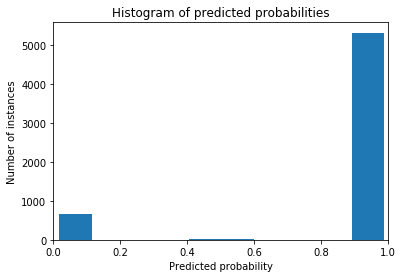

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_train_prob[:, 1]) # plot the probabilities in the second column (index 1)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Number of instances')

Using probabilities, we can calculate performance metrics such as AUC (Area Under the Curve).

0.952385049131938


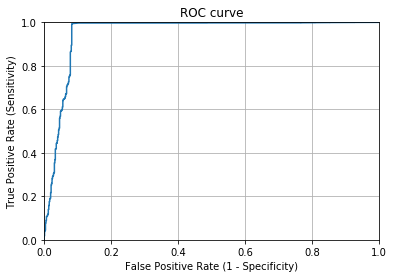

In [26]:
from sklearn import metrics

print(metrics.roc_auc_score(y_train, y_pred_train_prob[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

###Let's binarise the probabilities using the 0.5 threshold. this is the best threshold as testing

In [27]:
from sklearn.preprocessing import binarize

y_pred_train_class = binarize([y_pred_train_prob[:, 1]], 0.5)[0]
y_pred_train_class

array([1., 1., 1., ..., 1., 1., 1.])

Find the confusion matrix and accuracy using the binarized values after applying the 0.5 threshold.

In [28]:
from sklearn.metrics import confusion_matrix

print(metrics.classification_report(y_train, y_pred_train_class))

print("Confusion Matrix:")
conf_mat_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_class)
print(conf_mat_train)

TP = conf_mat_train[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_train[0,0]
print("True Negatives:", TN)
FP = conf_mat_train[0,1]
print("False Positives:", FP)
FN = conf_mat_train[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train_class))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       714
           1       0.99      1.00      0.99      5299

    accuracy                           0.99      6013
   macro avg       0.98      0.95      0.96      6013
weighted avg       0.98      0.99      0.98      6013

Confusion Matrix:
[[ 648   66]
 [  24 5275]]
True Positives: 5275
True Negatives: 648
False Positives: 66
False Negatives: 24
Accuracy: 0.9850324297355729


In [29]:
### test data

In [30]:
# using the best model determined by the random grid search, do the predictions on the test data (output a probability)
y_pred_test_prob=mlp_gr_src.predict_proba(X=x_test)  
y_pred_test_prob[0:10] 

array([[0.01134754, 0.98865246],
       [0.01444812, 0.98555188],
       [0.01134766, 0.98865234],
       [0.01134717, 0.98865283],
       [0.98297113, 0.01702887],
       [0.01140248, 0.98859752],
       [0.0113683 , 0.9886317 ],
       [0.01134871, 0.98865129],
       [0.01134783, 0.98865217],
       [0.01134713, 0.98865287]])

0.8404989944747872


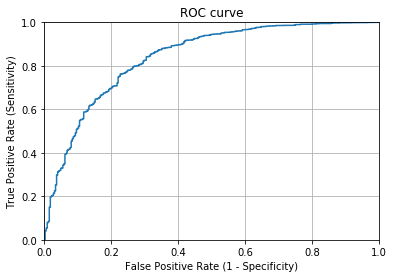

In [31]:
from sklearn import metrics

print(metrics.roc_auc_score(y_test, y_pred_test_prob[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [32]:
y_pred_test_class = binarize([y_pred_test_prob[:, 1]], 0.5)[0]

print(metrics.classification_report(y_test, y_pred_test_class))

print("Confusion Matrix:")
conf_mat_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_class)
print(conf_mat_test)

TP = conf_mat_test[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_test[0,0]
print("True Negatives:", TN)
FP = conf_mat_test[0,1]
print("False Positives:", FP)
FN = conf_mat_test[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.56      0.49      0.53       321
           1       0.93      0.95      0.94      2257

    accuracy                           0.89      2578
   macro avg       0.75      0.72      0.73      2578
weighted avg       0.88      0.89      0.89      2578

Confusion Matrix:
[[ 158  163]
 [ 122 2135]]
True Positives: 2135
True Negatives: 158
False Positives: 163
False Negatives: 122
Accuracy: 0.8894491854150505


##### Apply in Brandwatch data
- Do the predictions and calculate the performance metrics

In [33]:
## apply our model on the tfidf2
y_pred_test_prob=mlp_gr_src.predict_proba(X=tfidf_pd_df2)
y_pred_test_prob[0:10] # show the first 10 instances; the number in the second column shows how likely that instance is to be categorized as 'positive'

array([[0.0113479 , 0.9886521 ],
       [0.0805489 , 0.9194511 ],
       [0.01137715, 0.98862285],
       [0.98039951, 0.01960049],
       [0.01134913, 0.98865087],
       [0.0113479 , 0.9886521 ],
       [0.01136275, 0.98863725],
       [0.01242296, 0.98757704],
       [0.01134719, 0.98865281],
       [0.01134719, 0.98865281]])

In [34]:
y_pred_test_class = binarize([y_pred_test_prob[:, 1]], 0.5)[0]

In [35]:
data_brandwatch2020["Sentiment_predict_vandar"]=y_pred_test_class

##Check results on test data while using a 0.5 threshold.

In [37]:
#predict based on TextBlob dictionary, we just have to repeat what we did before

In [38]:
## get the Sentiment with TextBlob dictionary
from textblob import TextBlob
data_BazarVoice['TextBlob_lem']=data_BazarVoice['lemmatized_sentences'].apply(lambda x: TextBlob(x).polarity)
data_BazarVoice["Text_Sentiment"] = data_BazarVoice['TextBlob_lem'].apply(lambda x: 1 if x >= 0 else 0)

In [39]:
## 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=15) 
my_tfidf = tfidf_vectorizer.fit_transform(data_BazarVoice['lemmatized_sentences'])
my_tfidf # as you change the number for min_df, the size of the matrix changes; the higher the value, the fewer columns the matrix has
# there is no magic number that would need to be used for min_df; when you prepare the tf-idf for predictive modeling, you can try a few values and then run models for different value and see how the results look like
tfidf_pd_df = pd.DataFrame(my_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names())

# bring the sentiement column to the tf-idf data frame so that we can use this column as a dependent variable in future analysis
tfidf_pd_df['sentiment_text'] = data_BazarVoice["Text_Sentiment"]
tfidf_pd_df['Sentiment'] =data_BazarVoice["Sentiment"]
tfidf_pd_df.head()

,ability,able,absolutely,access,across,act,action,actual,actually,add,...,wow,write,wrong,year,yes,yesterday,yet,zero,sentiment_text,Sentiment
0,0.0,0.0,0.397604,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,1
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.211833,0.0,0.0,...,0.0,0.214511,0.0,0.0,0.0,0.0,0.0,0.000000,1,0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,1
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.331472,1,0


In [40]:
## prepare for test data

In [41]:
data_brandwatch2020['TextBlob_lem']=data_brandwatch2020['lemmatized_sentences'].apply(lambda x: TextBlob(x).polarity)
data_brandwatch2020["Text_Sentiment"] = data_brandwatch2020['TextBlob_lem'].apply(lambda x: 1 if x >= 0 else 0)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
# read more about TfidfVectorizer here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer2 = TfidfVectorizer(min_df=972) # min_df is used to disregard the words that appear less than n times; likewise, you can use max_df, to remove the words that appear very often; check more info in the link for the documentation above
my_tfidf2 = tfidf_vectorizer2.fit_transform(data_brandwatch2020["lemmatized_sentences"])
my_tfidf2 # as you change the number for min_df, the size of the matrix changes; the higher the value, the fewer columns the matrix has
# there is no magic number that would need to be used for min_df; when you prepare the tf-idf for predictive modeling, you can try a few values and then run models for different value and see how the results look like
tfidf_pd_df2 = pd.DataFrame(my_tfidf2.toarray(), columns=tfidf_vectorizer2.get_feature_names())

# bring the sentiement column to the tf-idf data frame so that we can use this column as a dependent variable in future analysis
tfidf_pd_df2['sentiment_text'] = data_brandwatch2020["Text_Sentiment"]
tfidf_pd_df2.head()

,aarp,able,absolutely,accord,acid,across,act,action,actually,ad,...,ya,yeah,year,yellow,yes,yet,yo,young,zero,sentiment_text
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [43]:
tfidf_pd_df2.tail()

,aarp,able,absolutely,accord,acid,across,act,action,actually,ad,...,ya,yeah,year,yellow,yes,yet,yo,young,zero,sentiment_text
241355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
241356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
241357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
241358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
241359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [44]:
x = tfidf_pd_df.drop("Sentiment", axis=1)
y = tfidf_pd_df.Sentiment
x.head(10)

,ability,able,absolutely,access,across,act,action,actual,actually,add,...,woven,wow,write,wrong,year,yes,yesterday,yet,zero,sentiment_text
0,0.0,0.0,0.397604,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.211833,0.0,0.0,...,0.0,0.0,0.214511,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.331472,1
5,0.0,0.0,0.000000,0.0,0.202959,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.112810,0.0,0.000000,0.0,0.000000,1
6,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.326249,0.0,0.000000,0
7,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
8,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1
9,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.138356,0.0,0.000000,0.0,0.000000,1


In [45]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=106) 

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network  import MLPClassifier

mlp = MLPClassifier()

hyper_parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (3,2,3), (3,5), (10, 10)], # (50,50,50) means 3 layers, each having 5 nodes; add more nodes when working with larger data
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'], # adaptive learning rate updates when needed, in relationship with epochs (check documentation)
}

# set up the structure of the random grid search using mlp model; n_iter denotes how many models should be tried by randomly selecting hyper-parameters
mlp_gr_src = RandomizedSearchCV(mlp, hyper_parameter_space, n_iter = 5, cv = 10, random_state = 123, scoring = 'accuracy') # cv = cross-validation

# fit the ml (with random grid search) on the train data
mlp_gr_src.fit(X=x_train, y=y_train)

D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rando...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                         

In [47]:
mlp_gr_src.cv_results_

{'mean_fit_time': array([31.94562738, 16.67349055, 22.79232571, 13.89244442, 13.57284236]),
 'std_fit_time': array([ 3.57503383, 10.16484332,  2.44741307,  4.98386495,  0.40398378]),
 'mean_score_time': array([0.01829991, 0.01540933, 0.01710474, 0.01154945, 0.01327767]),
 'std_score_time': array([0.00341758, 0.00164187, 0.00912899, 0.00648482, 0.00679195]),
 'param_learning_rate': masked_array(data=['adaptive', 'constant', 'constant', 'constant',
                    'adaptive'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[(10, 10), (3, 2, 3), (3, 5), (5, 5, 5), (3, 5)],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_activation': masked_array(data=['tanh', 'relu', 'tanh', 'tanh', 'tanh'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'

In [48]:
## Train Data

In [49]:
# using the best model determined by the random grid search, do the predictions on the train data (output a probability)
y_pred_train_prob=mlp_gr_src.predict_proba(X=x_train)  
    # instead of predict_proba(), you could use predict():
        # this will output the predicted category directly; 
        # the model would still calculate probabilities, though it will automatically assume a threshold of 0.5;
y_pred_train_prob[0:10] # show the first 10 instances; the number in the second column shows how likely that instance is to be categorized as 'positive'

array([[0.00487335, 0.99512665],
       [0.01161102, 0.98838898],
       [0.00486733, 0.99513267],
       [0.00493777, 0.99506223],
       [0.0048691 , 0.9951309 ],
       [0.00502677, 0.99497323],
       [0.00562954, 0.99437046],
       [0.98528869, 0.01471131],
       [0.00486666, 0.99513334],
       [0.9758897 , 0.0241103 ]])

Text(0, 0.5, 'Number of instances')

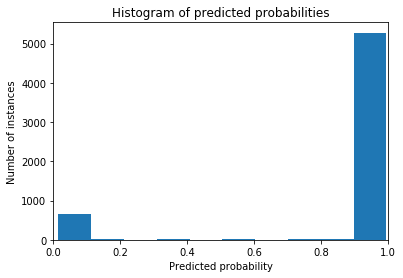

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_train_prob[:, 1]) # plot the probabilities in the second column (index 1)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Number of instances')

0.9677473367153995


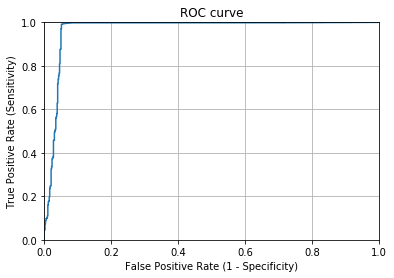

In [51]:
from sklearn import metrics

print(metrics.roc_auc_score(y_train, y_pred_train_prob[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [52]:
from sklearn.preprocessing import binarize

y_pred_train_class = binarize([y_pred_train_prob[:, 1]], 0.5)[0]
y_pred_train_class

array([1., 1., 1., ..., 1., 1., 1.])

In [53]:
print(metrics.classification_report(y_train, y_pred_train_class))

print("Confusion Matrix:")
conf_mat_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_class)
print(conf_mat_train)

TP = conf_mat_train[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_train[0,0]
print("True Negatives:", TN)
FP = conf_mat_train[0,1]
print("False Positives:", FP)
FN = conf_mat_train[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train_class))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       714
           1       0.99      1.00      0.99      5299

    accuracy                           0.99      6013
   macro avg       0.98      0.96      0.97      6013
weighted avg       0.99      0.99      0.99      6013

Confusion Matrix:
[[ 665   49]
 [  23 5276]]
True Positives: 5276
True Negatives: 665
False Positives: 49
False Negatives: 23
Accuracy: 0.9880259437884583


In [54]:
y_pred_train_class = binarize([y_pred_train_prob[:, 1]], 0.5)[0]

print(metrics.classification_report(y_train, y_pred_train_class))

print("Confusion Matrix:")
conf_mat_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_class)
print(conf_mat_train)

TP = conf_mat_train[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_train[0,0]
print("True Negatives:", TN)
FP = conf_mat_train[0,1]
print("False Positives:", FP)
FN = conf_mat_train[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train_class))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       714
           1       0.99      1.00      0.99      5299

    accuracy                           0.99      6013
   macro avg       0.98      0.96      0.97      6013
weighted avg       0.99      0.99      0.99      6013

Confusion Matrix:
[[ 665   49]
 [  23 5276]]
True Positives: 5276
True Negatives: 665
False Positives: 49
False Negatives: 23
Accuracy: 0.9880259437884583


In [55]:
## test data

In [56]:
# using the best model determined by the random grid search, do the predictions on the test data (output a probability)
y_pred_test_prob=mlp_gr_src.predict_proba(X=x_test)  
    # instead of predict_proba(), you could use predict():
        # this will output the predicted category directly; 
        # the model would still calculate probabilities, though it will automatically assume a threshold of 0.5;
y_pred_test_prob[0:10] # show the first 10 instances; the number in the second column shows how likely that instance is to be categorized as 'positive'

array([[0.00486778, 0.99513222],
       [0.01012541, 0.98987459],
       [0.00487127, 0.99512873],
       [0.00486687, 0.99513313],
       [0.98530657, 0.01469343],
       [0.00489985, 0.99510015],
       [0.00489821, 0.99510179],
       [0.00488676, 0.99511324],
       [0.00494786, 0.99505214],
       [0.0048667 , 0.9951333 ]])

0.8247308132400825


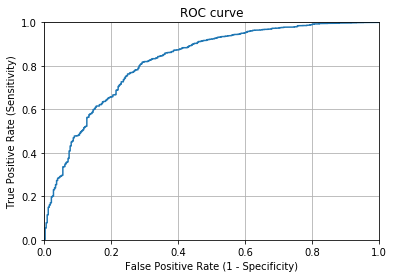

In [57]:
from sklearn import metrics

print(metrics.roc_auc_score(y_test, y_pred_test_prob[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [58]:
y_pred_test_class = binarize([y_pred_test_prob[:, 1]], 0.5)[0]

print(metrics.classification_report(y_test, y_pred_test_class))

print("Confusion Matrix:")
conf_mat_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_class)
print(conf_mat_test)

TP = conf_mat_test[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_test[0,0]
print("True Negatives:", TN)
FP = conf_mat_test[0,1]
print("False Positives:", FP)
FN = conf_mat_test[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test_class))

              precision    recall  f1-score   support

           0       0.49      0.48      0.49       321
           1       0.93      0.93      0.93      2257

    accuracy                           0.87      2578
   macro avg       0.71      0.71      0.71      2578
weighted avg       0.87      0.87      0.87      2578

Confusion Matrix:
[[ 155  166]
 [ 159 2098]]
True Positives: 2098
True Negatives: 155
False Positives: 166
False Negatives: 159
Accuracy: 0.873933281613654


In [59]:
## Apply in Brandwatch

In [60]:
# using the best model determined by the random grid search, do the predictions on the test data (output a probability)
y_pred_test_prob=mlp_gr_src.predict_proba(X=tfidf_pd_df2)
    # instead of predict_proba(), you could use predict():
        # this will output the predicted category directly; 
        # the model would still calculate probabilities, though it will automatically assume a threshold of 0.5;
y_pred_test_prob[0:10] # show the first 10 instances; the number in the second column shows how likely that instance is to be categorized as 'positive'

array([[0.0048678 , 0.9951322 ],
       [0.00633195, 0.99366805],
       [0.00489867, 0.99510133],
       [0.98507763, 0.01492237],
       [0.00488847, 0.99511153],
       [0.0048678 , 0.9951322 ],
       [0.00486792, 0.99513208],
       [0.00536021, 0.99463979],
       [0.00486687, 0.99513313],
       [0.00486695, 0.99513305]])

In [61]:
y_pred_test_class = binarize([y_pred_test_prob[:, 1]], 0.5)[0]

In [62]:
data_brandwatch2020["Sentiment_predict_text"]=y_pred_test_class

In [63]:
data_brandwatch2020.to_csv(r'D:\BA course\term4\consulting project\data\SA result_final.csv')